In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spopt
import scipy.interpolate as spinterp
import scipy.integrate as spint

In [2]:
p_t= np.genfromtxt('pulsar-timing.txt', dtype='float', usecols=(0,1,2,3), names=True)
print(p_t.dtype.names)

('obs', 'date', 'dt', 'error')


Programming challenge 1


For the case of constant orbit the model that we are going to use for the fitting is

In [3]:
def func_a(t_val,*parm):
    alpha=parm[0]
    return alpha;


Now we are doing the fitting using the the curve_fit.

In [4]:
p0=[7.76]#initial parameters

ml_cfpars, ml_cfcovar = spopt.curve_fit(func_a, p_t['date'], p_t['dt'], 
                                        p0, sigma=p_t['error'])

print("The covariance matrix is:\n",ml_cfcovar)
err = np.sqrt(np.diag(ml_cfcovar)) 
print("a= "+str(ml_cfpars[0])+" +/- "+str(err[0]))

The covariance matrix is:
 [[0.02279659]]
a= -1.0839256196834055 +/- 0.1509853907328685


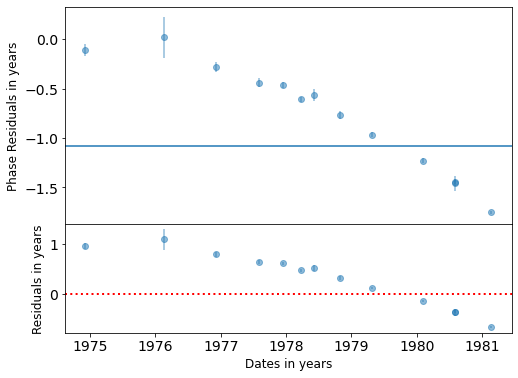

In [5]:
model_t=np.linspace(1972.0,1982.0,1000)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)

ax1.errorbar(p_t['date'], p_t['dt'], yerr=p_t['error'], marker="o", linestyle="",alpha=0.5)
ax1.axhline(ml_cfpars[0])#because inthe first case the function is constant
#ax1.plot(model_t,func_a(model_t,*ml_cfpars),lw=2)
ax1.set_ylabel("Phase Residuals in years",fontsize=12)
ax1.tick_params(labelsize=14)

ax2.errorbar(p_t['date'],p_t['dt']-func_a(p_t['date'],*ml_cfpars),
             yerr=p_t['error'],marker="o", linestyle="",alpha=0.5)
ax2.set_xlabel("Dates in years",fontsize=12)
ax2.set_ylabel("Residuals in years", fontsize=12)
ax2.axhline(0.0, color='r', linestyle='dotted', lw=2) 
ax2.tick_params(labelsize=14)
plt.show()

In [6]:
minchisq = np.sum(((p_t['dt']-func_a(p_t['date'],*ml_cfpars))/p_t['error'])**2)

dof = len(p_t['date'])-len(p0)
print("Minimum Chi-squared = "+str(minchisq)+" for "+str(dof)+" d.o.f.")
print("The goodness of fit is: ",sps.chi2.sf(minchisq,df=dof))

Minimum Chi-squared = 3548.1567279428273 for 12 d.o.f.
The goodness of fit is:  0.0


There two ways to judge if the fit is good or not. The first one is with the parameter called goodness of fit. The goodness of the fit is the p-value of the chi squared distribution. In the words it is the value of the survival function of the chi squared distribution for given arguments the minimum chi squared and the degrees of freedom $\nu$ where $\nu$ is number of data points minus the number of free parameters in the model. Another way to judge wether the fit is good or not is through the ratio $\frac{\chi^2}{\nu}$. If the ratio is close to 1 then the fiting is good if the ratio is greater than 1 then the fitting is bad. In the case that the ratio is smaller than 1 it means that the data is over fitted or the errors are over estimated.



In this particular case it is clearly a realy bad fit because because the ratio $\frac{\chi^2}{\nu}$ is by far greater than 1 and the p-value comes out so small that is practically zero.

For the case of constant orbit but in correct period the model that we are going to do the fitting is:

In [7]:
def func_b(t_val,*parm):
    alpha=parm[0]
    beta=parm[1]
    return alpha+beta*t_val;

In [8]:
p0=[7.76,10.0]#initial parameters

ml_cfpars, ml_cfcovar = spopt.curve_fit(func_b, p_t['date'], p_t['dt'], 
                                        p0, sigma=p_t['error'])

print("The covariance matrix is:\n",ml_cfcovar)
err = np.sqrt(np.diag(ml_cfcovar)) 
print("a= "+str(ml_cfpars[0])+" +/- "+str(err[0]))
print("b= "+str(ml_cfpars[1])+" +/- "+str(err[1]))

The covariance matrix is:
 [[ 2.15853468e+03 -1.09045438e+00]
 [-1.09045438e+00  5.50879000e-04]]
a= 680.6357453854216 +/- 46.46003311959991
b= -0.3443931814666728 +/- 0.02347081165446883


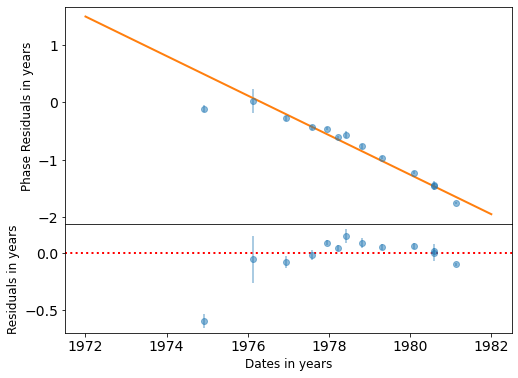

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)

ax1.errorbar(p_t['date'], p_t['dt'], yerr=p_t['error'], marker="o", linestyle="",alpha=0.5)
ax1.plot(model_t,func_b(model_t,*ml_cfpars),lw=2)
ax1.set_ylabel("Phase Residuals in years",fontsize=12)
ax1.tick_params(labelsize=14)

ax2.errorbar(p_t['date'],p_t['dt']-func_b(p_t['date'],*ml_cfpars),
             yerr=p_t['error'],marker="o", linestyle="",alpha=0.5)
ax2.set_xlabel("Dates in years",fontsize=12)
ax2.set_ylabel("Residuals in years", fontsize=12)
ax2.axhline(0.0, color='r', linestyle='dotted', lw=2) 
ax2.tick_params(labelsize=14)
plt.show()

In [10]:
minchisq = np.sum(((p_t['dt']-func_b(p_t['date'],*ml_cfpars))/p_t['error'])**2)

dof = len(p_t['date'])-len(p0)
print("Minimum Chi-squared = "+str(minchisq)+" for "+str(dof)+" d.o.f.")
print("The goodness of fit is: ",sps.chi2.sf(minchisq,df=dof))

Minimum Chi-squared = 172.46601027179526 for 11 d.o.f.
The goodness of fit is:  3.6656133364311255e-31


This time the fitting is quite better but still the ratio is about 15 which is still rather large and the p-value is extremely small. So we can definitely find a better fit to our data.

For the case that the period is constantly changing the model that we are  going to do the fitting on is:

In [11]:
def func_c(t_val,*parm):
    alpha=parm[0]
    beta=parm[1]
    gamma=parm[2]
    return alpha+beta*t_val+gamma*(t_val**2);

In [12]:
p0=[7.76,10.0,5.0]#initial values

ml_cfpars, ml_cfcovar = spopt.curve_fit(func_c, p_t['date'], p_t['dt'], 
                                        p0, sigma=p_t['error'])

print("The covariance matrix is:\n",ml_cfcovar)
err = np.sqrt(np.diag(ml_cfcovar)) 
print("a= "+str(ml_cfpars[0])+" +/- "+str(err[0]))
print("b= "+str(ml_cfpars[1])+" +/- "+str(err[1]))
print("c= "+str(ml_cfpars[2])+" +/- "+str(err[2]))

The covariance matrix is:
 [[ 1.69778887e+08 -1.71580491e+05  4.33502763e+01]
 [-1.71580491e+05  1.73401250e+02 -4.38103053e-02]
 [ 4.33502763e+01 -4.38103053e-02  1.10687971e-05]]
a= -161371.11990930137 +/- 13029.922736756676
b= 163.42685302892687 +/- 13.168190847144858
c= -0.0413772198632697 +/- 0.0033269801835888097


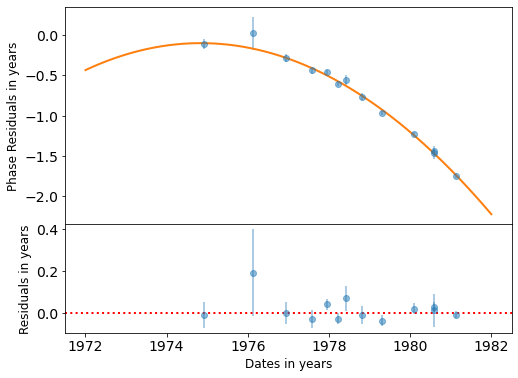

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig.subplots_adjust(hspace=0)

ax1.errorbar(p_t['date'], p_t['dt'], yerr=p_t['error'], marker="o", linestyle="",alpha=0.5)
ax1.plot(model_t,func_c(model_t,*ml_cfpars),lw=2)
ax1.set_ylabel("Phase Residuals in years",fontsize=12)
ax1.tick_params(labelsize=14)

ax2.errorbar(p_t['date'],p_t['dt']-func_c(p_t['date'],*ml_cfpars),
             yerr=p_t['error'],marker="o", linestyle="",alpha=0.5)
ax2.set_xlabel("Dates in years",fontsize=12)
ax2.set_ylabel("Residuals in years", fontsize=12)
ax2.axhline(0.0, color='r', linestyle='dotted', lw=2) 
ax2.tick_params(labelsize=14)
plt.show()

In [14]:
minchisq = np.sum(((p_t['dt']-func_c(p_t['date'],*ml_cfpars))/p_t['error'])**2)

dof = len(p_t['date'])-len(p0)
print("Minimum Chi-squared = "+str(minchisq)+" for "+str(dof)+" d.o.f.")
print("The goodness of fit is: ",sps.chi2.sf(minchisq,df=dof))

Minimum Chi-squared = 10.506631573368624 for 10 d.o.f.
The goodness of fit is:  0.397223133330097


This time the fit is realy good the p-value is about 40% and the ratio comes out about 1. So this is probably the best fit for this data and we can say that it is definitely the best fit from those we have tried so far.

Programming challenge 2

First we are defining the function histerbin that rebins the histogram to a given minimum counts per bin.

In [15]:
def histrebin(mininbin,counts,edges):
    
    edges2=np.zeros(1)
    counts2=np.zeros(1)
    i=0
    countsum=0
    firstbin_flag = 1
    edges2[0]=edges[0]
    for x in counts:
        countsum=countsum+x
        i=i+1
        if countsum >= mininbin and (sum(counts[i:]) >= mininbin or i == len(counts)):  
            if firstbin_flag == 1:
                counts2[0]=countsum
                firstbin_flag = 0
            else:
                counts2=np.append(counts2,countsum)
            edges2=np.append(edges2,edges[i])
            countsum=0        
    return counts2, edges2

At this point we are inserting the data and we are using the function we defined above in order to obtain the bins and edges for the final histogram to which we are going to fit the power law model.

In [16]:
photons = np.genfromtxt('photon_energies.txt')
emin, emax = 10., 200.
nbins = 50
counts, edges = np.histogram(photons, bins=nbins, range=[emin,emax], density=False)
mincounts = 20
counts2, edges2 = histrebin(mincounts,counts,edges)
bwidths = np.diff(edges2)
cdens = counts2/bwidths#yval
cdens_err = np.sqrt(counts2)/bwidths#dy
energies = (edges2[:-1]+edges2[1:])/2#xval

Now we are defining the power law model and a function that integrates the curve fit and obtain counts density

In [17]:
def pl_model(x, parm):
    pl_norm = parm[0]  
    pl_index = parm[1]
    return pl_norm * x**pl_index


In [18]:
def model_int_cf(ecent, ebins, model, *parm):
    
    i = 0
    ymod = np.zeros(len(ecent))
    for energy in ebins[:-1]:
        ymod[i], ymoderr = spint.quad(lambda x: model(x, parm),ebins[i],ebins[i+1])
        ymod[i] = ymod[i]/(ebins[i+1]-ebins[i])  
        i=i+1
    return ymod

Now we are fitting the data to our power law model

In [19]:
model = pl_model
p0 = [2500.0, -1.5]  
ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda energies, *parm: model_int_cf(energies, edges2, model, *parm),
                                        energies, cdens, p0, sigma=cdens_err)
err = np.sqrt(np.diag(ml_cfcovar))
print("Covariance matrix: \n",ml_cfcovar)

print("Normalisation at 1 GeV = " + str(ml_cfpars[0]) + " +/- " + str(err[0]))
print("Power-law index = " + str(ml_cfpars[1]) + " +/- " + str(err[1]))
minchisq = np.sum(((cdens - model_int_cf(energies, edges2, model, *ml_cfpars))/cdens_err)**2.)

print("Minimum Chi-squared = " + str(minchisq) + " for " + str(len(cdens)-len(p0)) + " d.o.f.")
print("The goodness of fit is: " + str(sps.chi2.sf(minchisq,df=(len(cdens)-len(p0)))))

Covariance matrix: 
 [[ 1.38557897e+05 -1.43587826e+01]
 [-1.43587826e+01  1.57030675e-03]]
Normalisation at 1 GeV = 2695.8605004131714 +/- 372.23365894181904
Power-law index = -1.5725093885531372 +/- 0.0396270962109368
Minimum Chi-squared = 20.652085891889353 for 20 d.o.f.
The goodness of fit is: 0.41785865938156186


We can see that the fit is rather good because the ratio $\chi_{\nu}/\nu$ where $\nu$ are the degrees of freedom. The fit is really good because the ratio is about 1 and the p-value is 40% which is very promising. Bellow we are defining a function from which we obtain the chi squared grid. We had to do some changes in the code of this function in order to make it work for our case.

In [20]:
def grid2d_chisqmin(ab_index,ab_range,ab_steps,parm,model,xval,yval,dy):
    '''Finds best fit and then carries out chisq minimisation for a 1D grid of fixed parameters.
       Input: 
            ab_index - tuple/list with indices of 'a' and 'b' parameter (in input list parm) to use for grid.
            ab_range, ab_steps - range (nested tuple or list) and list/tuple with number of steps for grid
                for parameters a and b.
            parm - parameter list for model to be fitted.
            model - name of model function to be fitted.
            xval, dyval, dy - data x, y and y-error arrays
        Output: 
            ab_best - list of best-fitting values for a and b.
            minchisq - minimum chi-squared (for ab_best)
            a_grid, b_grid - grids of 'a' and 'b' values used to obtain fits
            chisq_grid - 2-D grid of chi-squared values corresponding to ab_grid'''
    a_grid = np.linspace(ab_range[0][0],ab_range[0][1],ab_steps[0])
    b_grid = np.linspace(ab_range[1][0],ab_range[1][1],ab_steps[1])
    chisq_grid = np.zeros((len(a_grid),len(b_grid)))
    # First obtain best-fitting values for a and b and corresponding chi-squared
    ml_cfpars, ml_cfcovar = spopt.curve_fit(model, xval, yval, parm, sigma=dy)    
    minchisq = np.sum(((yval-model(xval,*ml_cfpars))/dy)**2)
    ab_best = [ml_cfpars[ab_index[0]], ml_cfpars[ab_index[1]]]
    # Now remove 'a' and 'b' from the input parameter list, so these parameters may be frozen at the 
    # grid value for each fit
    free_parm = np.delete(parm,ab_index)
    # Now fit for each a and b in the grid, to do so we must use a lambda function to insert the fixed 
    # a and b into the model function when it is called by curve_fit, so that curve_fit does not use 
    # a or b as one of the free parameters so they remain at the fixed grid value in the fit.
    for i, a_val in enumerate(a_grid):
        for j, b_val in enumerate(b_grid):
           #ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda xval, 
            #*free_parm: model(xval, *np.insert(np.insert(free_parm,ab_index[0],a_val),ab_index[1],b_val)), 
             #                                       xval, yval, free_parm, sigma=dy)
            chisq_grid[i,j] = np.sum(((yval-model(xval,
                           a_val,b_val))/dy)**2)
       # print(str((i+1)*len(b_grid))+' out of '+str(len(a_grid)*len(b_grid))+' grid-points calculated')
    return ab_best, minchisq, a_grid, b_grid, chisq_grid 

Now we are making the chi squared grid from our data.

In [21]:
model = pl_model
parm = [2500.0, -1.5] # starting parameters for initial fit
par_indices = [0,1]
par_ranges = [[1500,4500],[-1.4,-1.75]]
par_steps = [100,100]
ab_best, minchisq, a_grid, b_grid, chisq_grid  = grid2d_chisqmin(par_indices,par_ranges,par_steps,
parm,lambda energies, *parm: model_int_cf(energies, edges2, model, *parm),energies,cdens,cdens_err)

Now we are making the contour plot for the powel law MLEs

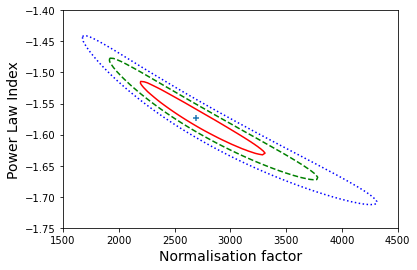

In [22]:
del1 = sps.chi2.isf(2*sps.norm.sf(1),df=2)#1-sigma confidence region with 2 degrees of freedom because it is a two parameter space  
del2 = sps.chi2.isf(2*sps.norm.sf(2),df=2)#2-sigma
del3 = sps.chi2.isf(2*sps.norm.sf(3),df=2)#3-sigma

X, Y = np.meshgrid(a_grid,b_grid,indexing='ij')
Z = chisq_grid
levels = [minchisq+del1, minchisq+del2, minchisq+del3]
plt.figure()
plt.contour(X, Y, Z, levels, colors=('r', 'g', 'b'), linestyles=('solid','dashed','dotted'))
plt.scatter(*ab_best, marker="+")
plt.xlabel(r'Normalisation factor', fontsize=14)
plt.ylabel(r'Power Law Index', fontsize=14)
plt.show()

We are defining a function from which we can generate our likelihood function using Poisson distribution.

In [23]:
def LogLikelihood_Pois_Integ(parm, model, ebins, counts): 
    
    i = 0
    ymod = np.zeros(len(counts))
    for energy in ebins[:-1]:
        ymod[i], ymoderr = spint.quad(lambda x: model(x, parm),ebins[i],ebins[i+1])
        # we don't normalise by bin width since the rate parameter is set by the model and needs to be 
        # in counts per bin
        i=i+1        
    pd = sps.poisson(ymod) #we define our Poisson distribution
    return -sum(pd.logpmf(counts))

We are calculating the MLE

In [24]:
result = spopt.minimize(LogLikelihood_Pois_Integ, parm, args=(pl_model, edges, counts), method='BFGS')

err = np.sqrt(np.diag(result.hess_inv))
print("Covariance matrix: \n",result.hess_inv)
print("Normalisation at 1 GeV = " + str(result.x[0]) + " +/- " + str(err[0]))
print("Power-law index = " + str(result.x[1]) + " +/- " + str(err[1]))
print("Maximum log-likelihood = " + str(-1.0*result.fun))

Covariance matrix: 
 [[0.00167929 0.00033136]
 [0.00033136 0.00011048]]
Normalisation at 1 GeV = 2555.19507633651 +/- 0.04097911375985234
Power-law index = -1.5509355551083115 +/- 0.010511031769118955
Maximum log-likelihood = -126.29341311424108


Now we are creating a 2D grid parameter space for the power law index and normalization like the grid2d_chisqmin function above but in this case the grid point are from 

In [25]:
model = pl_model
parm = [2500.0, -1.5] # starting parameters for initial fit
par_indices = [0,1]
par_ranges = [[1500,4500],[0,-2.5]]
par_steps = [100,100]
a_grid=np.linspace(200,14500,100)#Normalisation factor values
b_grid=np.linspace(-1,-2.2,100)#Power law index values

poisson_grid = np.zeros((len(a_grid),len(b_grid)))
for i, a_val in enumerate(a_grid):
    for j, b_val in enumerate(b_grid):
        par=[a_val,b_val]
        poisson_grid[i,j]  =np.sum(LogLikelihood_Pois_Integ(par, model, edges2, counts2))
   
 
         


Now we are about to do the contoy=ur plot of our confidense regions. In this case in order to calculate the delta we have to use the poisson distribution with rate the mean of the counts.

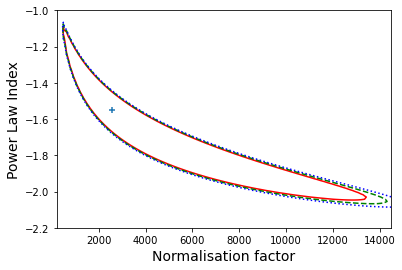

In [26]:
del1 = sps.poisson.isf(2*sps.norm.sf(1),mu=np.mean(counts))
del2 = sps.poisson.isf(2*sps.norm.sf(2),mu=np.mean(counts))
del3 = sps.poisson.isf(2*sps.norm.sf(3),mu=np.mean(counts))

X, Y = np.meshgrid(a_grid,b_grid,indexing='ij')
Z = poisson_grid
levels = [result.fun+del1, result.fun+del2, result.fun+del3]
plt.figure()
plt.contour(X, Y, Z, levels, colors=('r', 'g', 'b'), linestyles=('solid','dashed','dotted'))
plt.scatter(result.x[0],result.x[1], marker="+")
plt.xlabel(r'Normalisation factor', fontsize=14)
plt.ylabel(r'Power Law Index', fontsize=14)
plt.show()




Comparing the two contour plots we can firstly observe a the difference between the positions of the most likelihood estimations what I mean by that is that the best fit values of each fitting are a bit different. But the biggest difference betweeen the two plots is the shape and size of the contours. In the second case we can see that the contours cover a big range of normalisation factor even at the 1 sigma confidence regions. So  we can say that this method can predict the power law index and normalisation factor quite well, when it comes to calculating confidence region it is better to do it through the chi squared method because it seems a lot more precise.

Programming challenge 3


Firstly we import the data and and then using the histerbinfunction we are calculating the number of counts and edges to a given minimum of counts per bin. After some trial runs we choose that the minimum counts per bin will be thirty because that gives us the best possible fitting.

In [41]:
events = np.genfromtxt('event_energies.txt')
emin, emax = 20., 300.
nbins = 50
counts, edges = np.histogram(photons, bins=nbins, range=[emin,emax], density=False)
mincounts = 20
counts2, edges2 = histrebin(mincounts,counts,edges)
bwidths = np.diff(edges2)
cdens = counts2/bwidths#yval
cdens_err = np.sqrt(counts2)/bwidths#dy
energies = (edges2[:-1]+edges2[1:])/2#xval

Now we are going to define the continuum model for the spectrum.


In [51]:
def c_model(x,parm):
    c_norm=parm[0]#normalization factor
    c_gamma=parm[1]#power law index
    c_ecut=parm[2]#energy cut of
    return c_norm*(x**(c_gamma))*np.exp(-x/c_ecut)

Now we are about to do the fitting to the continuum model.

In [52]:
model = c_model
p0 = [1000,1,80]  # Initial power-law parameters
ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda energies, *parm: model_int_cf(energies, edges2, model, *parm),
                                        energies, cdens, p0, sigma=cdens_err)
err = np.sqrt(np.diag(ml_cfcovar))
print("Covariance matrix: \n ",ml_cfcovar)

print("Normalisation at 1 GeV = " + str(ml_cfpars[0]) + " +/- " + str(err[0]))
print("Power-law index = " + str(ml_cfpars[1]) + " +/- " + str(err[1]))
print("Energy cut off= "+str(ml_cfpars[2])+"+/-"+str(err[2]))
minchisq = np.sum(((cdens - model_int_cf(energies, edges2, model, *ml_cfpars))/cdens_err)**2.)

print("Minimum Chi-squared = " + str(minchisq) + " for " + str(len(cdens)-len(p0)) + " d.o.f.")
print("The goodness of fit is: " + str(sps.chi2.sf(minchisq,df=(len(cdens)-len(p0)))))

Covariance matrix: 
  [[ 1.64870599e+05 -8.68633400e+01  1.02909193e+04]
 [-8.68633400e+01  4.63307167e-02 -5.66973575e+00]
 [ 1.02909193e+04 -5.66973575e+00  7.86219213e+02]]
Normalisation at 1 GeV = 594.6572082029669 +/- 406.04260722186103
Power-law index = -1.0408198244781668 +/- 0.2152457123778316
Energy cut off= 100.6540910336678+/-28.03960079646796
Minimum Chi-squared = 17.437227898590756 for 13 d.o.f.
The goodness of fit is: 0.1800794634605242


The model fits our data quite well. This happens because the ratio $\chi_{\nu}/\nu$ is about 1 and the goodness of the fit is about 38%. Next we are introducing the function plot_spec_model with which we are going to plot our model.

In [30]:
def plot_spec_model(ebins,cdens,cdens_err,cdens_model):
    energies = (ebins[1:]+ebins[:-1])/2
    bwidths = np.diff(ebins)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.subplots_adjust(hspace=0)
    ax1.errorbar(energies, cdens, xerr=bwidths/2., yerr=cdens_err, fmt='o')
    model_hist, edges, patches = ax1.hist(energies, bins=ebins, weights=cdens_model, 
                                      density=False, histtype='step')
    ax2.errorbar(energies, cdens/cdens_model, xerr=bwidths/2., yerr=cdens_err/cdens_model, fmt='o')
    ax2.set_xlabel("Energy (GeV)", fontsize=16)
    ax1.set_ylabel("Counts/Gev", fontsize=14)
    ax2.set_ylabel("data/model", fontsize=14)
    ax2.axhline(1.0, color='r', linestyle='dotted', lw=2) 
    ax1.tick_params(labelsize=14)
    ax1.tick_params(axis="x",direction="in",which="both", length=4)
    ax2.tick_params(axis="x",which="both", length=4)
    ax2.tick_params(labelsize=14)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.get_yaxis().set_label_coords(-0.12,0.5)
    ax2.get_yaxis().set_label_coords(-0.12,0.5)
    ax2.set_xlim(ebins[0],ebins[-1])
    plt.show()

Using this function we are making the plot bellow.


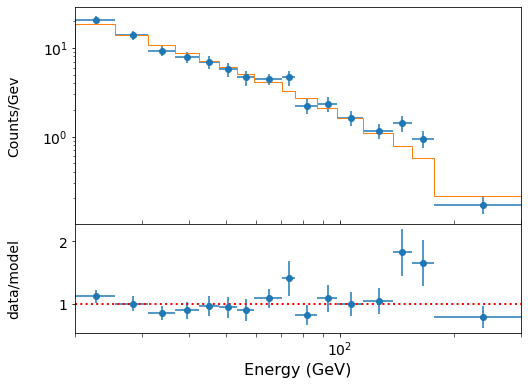

In [45]:
best_model = model_int_cf(energies, edges2, model, *ml_cfpars)
plot_spec_model(edges2,cdens,cdens_err,best_model)

Using the datamodel ratio of our plot we can see that there may be a Gaussian feature near 70 to 80 Gev(which may be the given Gaussian around 80 to 85 GeV). Also, there may be a Gaussian feature around 120 to 130 GeV. Also there may be an absorption line around 35 GeV but we are not going to test for that in this exercise. 

Now we are going to add a Gaussian profile to our continuum model. To do that firstly we need to define a new model which will include the Gaussian profile.

In [46]:
def g_model(x,parm):
    g_norm=parm[0]#normalisation factor of continuum
    g_gamma=parm[1]#power law index of continuum
    g_ecut=parm[2]#energy cut-of of continuum
    g_gnorm=parm[3]#normalisation of Gaussian
    g_sigma=1.3#Gaussian width
    g_ecent=parm[4]#Gaussian centroid
    g_flux = np.exp(-0.5*((x - g_ecent)/g_sigma)**2)/(g_sigma*np.sqrt(2.*np.pi))
    return g_norm*(x**(g_gamma))*np.exp(-x/g_ecut)+g_gnorm*g_flux

Now we are going to do the fitting on this model.

In [33]:
mincounts = 30
counts2, edges2 = histrebin(mincounts,counts,edges)
bwidths = np.diff(edges2)
cdens = counts2/bwidths#yval
cdens_err = np.sqrt(counts2)/bwidths#dy
energies = (edges2[:-1]+edges2[1:])/2#xval

In [34]:
model = g_model
p0 = [1000,-1,100,10,70]  # Initial  parameters
ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda energies, *parm: model_int_cf(energies, edges2, model, *parm),
                                        energies, cdens, p0, sigma=cdens_err)
err = np.sqrt(np.diag(ml_cfcovar))
print("Covariance matrix: \n ",ml_cfcovar)

print("Normalisation at 1 GeV = " + str(ml_cfpars[0]) + " +/- " + str(err[0]))
print("Power-law index = " + str(ml_cfpars[1]) + " +/- " + str(err[1]))
print("Energy cut off (in GeV)= "+str(ml_cfpars[2])+" +/- "+str(err[2]))
print("Normalisation of Gaussian= "+str(ml_cfpars[3])+" +/- "+str(err[3]))
print("Gaussian centroid(in GeV)="+str(ml_cfpars[4])+" +/- "+str(err[4]))
minchisq = np.sum(((cdens - model_int_cf(energies, edges2, model, *ml_cfpars))/cdens_err)**2.)

print("Minimum Chi-squared = " + str(minchisq) + " for " + str(len(cdens)-len(p0)) + " d.o.f.")
print("The goodness of fit is: " + str(sps.chi2.sf(minchisq,df=(len(cdens)-len(p0)))))

Covariance matrix: 
  [[ 7.32507894e+05 -1.16106296e+02  9.28387370e+04  1.67479040e+03
   5.99269526e+01]
 [-1.16106296e+02  1.85987465e-02 -1.52470992e+01 -2.79264358e-01
  -9.89108640e-03]
 [ 9.28387370e+04 -1.52470992e+01  1.37446923e+04  2.22026323e+02
   7.62284260e+00]
 [ 1.67479040e+03 -2.79264358e-01  2.22026323e+02  3.95057648e+01
   9.79475228e-01]
 [ 5.99269526e+01 -9.89108640e-03  7.62284260e+00  9.79475228e-01
   2.00578596e-01]]
Normalisation at 1 GeV = 2001.1739640262215 +/- 855.8667499790317
Power-law index = -1.4548559510422878 +/- 0.13637722127424698
Energy cut off (in GeV)= 262.7354806523799 +/- 117.23775959580104
Normalisation of Gaussian= 23.195443810263477 +/- 6.285361153052549
Gaussian centroid(in GeV)=70.04091848156024 +/- 0.44786001778283235
Minimum Chi-squared = 3.643327480712859 for 8 d.o.f.
The goodness of fit is: 0.8877858775634723


I tried setting the centroid of the Gaussian around 80 Gev but the fit I was getting was terrible the goodness of the fit was about 20% and the ratio was about 2. By looking at the data/model ratio in the plot above we can clearly see that the centroid should be near 70 GeV even though according to exercise the centroid should be about 80 GeV. And indeed by setting the initial value of the centroid around 70 I immediately got the fit above. The goodness of this fit is 88% which means that this fit is extremely good. I have tried different minimum counts per bin just in case the centroid doesn't come up in the correct position due to the bins and the energy range each bin covers but I kept getting even worse fits. So I am going to trust my plots and fittings and consider that the Gaussian feature is near 70 GeV and not near 80 to 85 GeV as it was suggested by the exercise. Bellow I am using the plot_spec_model function that was defined earlier in order to  plot my model.

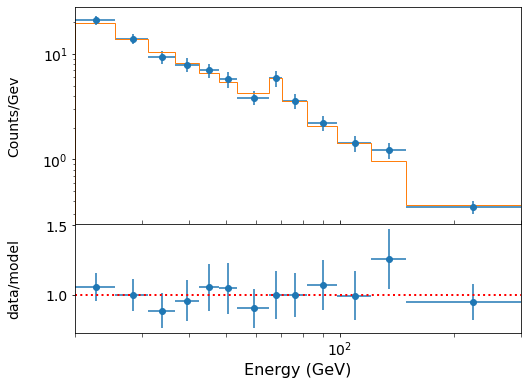

In [35]:
best_model = model_int_cf(energies, edges2, model, *ml_cfpars)
plot_spec_model(edges2,cdens,cdens_err,best_model)

Now we are going to estimate the significance of thisline feature. To do so we are going to use Wilks' theorem according to which  the log-likelihood-ratio is distributed as a $\chi^{2}_{m}$ distribution with degrees of freedom equal to the number of extra free parameters in a large data sample. The $\Delta\chi^{2}$ in our case is about 7.03. The degrees of freedom is 1. At first glance it seems that the degrees of freedom would be 2 but in line emissions model the energy of the line is not really a nestable parameter because the likelihood does not smoothly change if we change the position of such a sharp feature. So in our case m=1.

In [36]:
print("p-value for our delta-chi-squared: ",sps.chi2.sf(7.03,df=1))

p-value for our delta-chi-squared:  0.008015535297439966


The significance level is somewhere about 2.5$\sigma$ which is not great. In order to be able to say that this lines represent anything we need at least 3$\sigma$ significance. If we did not knew the energy range in order to calculate the significance we use the Bonferroni correction. We are going to calculate the chances of at least success, where success is considered p-value smaller than 0.008, in a number of trials. Following the lecture notes the number of trial should be about 18.


In [37]:
x=0
n=18
theta=sps.chi2.sf(7.03,df=1)
a=sps.binom.pmf(x,n,p=theta)
print("The chance that we would see at least 1 success p<0.008 is",1-a)

The chance that we would see at least 1 success p<0.008 is 0.1348574459301627


In  order to calculate the 3$\sigma$ upper limit we have to introduce two new function. Firstly we define the function grid1d_chisqmin_cfint which is calculating the best value for a single parameter and the minimum chi squared and also creates a grid of values for the parameter a and their corresponding chi squared.

In [38]:
def grid1d_chisqmin_cfint(a_index,a_range,a_steps,parm,model,xval,yval,dy,xedges):
    
    a_grid = np.linspace(a_range[0],a_range[1],a_steps)
    chisq_grid = np.zeros(len(a_grid))
    # First obtain best-fitting value for 'a' and corresponding chi-squared
    ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda xval, *parm: model_int_cf(xval, xedges, 
                            model, parm), xval, yval, parm, sigma=dy)
    
    minchisq = np.sum(((yval-model_int_cf(xval,xedges,model,*ml_cfpars))/dy)**2)
    a_best = ml_cfpars[a_index]
    # Now remove 'a' from the input parameter list, so this parameter may be frozen at the 
    # grid value for each fit
    free_parm = np.delete(parm,a_index)
    # Now fit for each 'a' in the grid, to do so we must use a lambda function to insert the fixed 
    # 'a' into the model function when it is called by curve_fit, so that curve_fit does not use 
    # 'a' as one of the free parameters so it remains at the fixed grid value in the fit.
    for i, a_val in enumerate(a_grid):        
        ml_cfpars, ml_cfcovar = spopt.curve_fit(lambda xval, *parm: model_int_cf(xval, xedges, 
                            model, parm), xval, yval, parm, sigma=dy)        
        chisq_grid[i] = np.sum(((yval-model_int_cf(xval,xedges,model,
                                                   *np.insert(ml_cfpars,a_index,a_val)))/dy)**2)
        #print(i+1,'steps: chisq =',chisq_grid[i],'for a =',a_val,' minimum = ',minchisq,' for a =',a_best)
    return a_best, minchisq, a_grid, chisq_grid  

Then we define the other function which interpolates the chi squared grid and the parameter grid defined above and returns the upper limit given a delta that we define in the function's arguments.

In [39]:
def calc_upper_chisq(delchisq,minchisq,a_grid,chisq_grid):
   
    # First interpolate over the grid for values > a_best and find upper interval bound
    chisq_interp_upper = spinterp.interp1d(chisq_grid,a_grid)
    a_upper = chisq_interp_upper(minchisq+delchisq)
    return a_upper

Now using these two function we are going to calculate. Before we make the calculation we need to freeze the parameter of energy centroid so durind the fitting procedure not all parameters can change.

In [40]:
fix_encent=144

new_model= lambda x, parm:g_model(x,np.insert(parm,4,fix_encent))

parm = [2000.0, -1.4, 262,0]

a_index = 3
par_range = [0,30]
n_steps = 100
a_best, minchisq, a_grid, chisq_grid = grid1d_chisqmin_cfint(a_index,par_range,n_steps,parm,new_model,
                             energies,cdens,cdens_err,edges2)
delchisq = sps.chi2.isf(2*sps.norm.sf(3),df=1)#because we need 3-sigma upper level
a_upper = calc_upper_chisq(delchisq,minchisq,a_grid,chisq_grid)
print("3-sigma upper limit on line flux: ", a_upper)

3-sigma upper limit on line flux:  23.720057891851646


So we can say that there is a 0.1% chance that the number of events for the proposed new particle events will be greatter 23.7.